# Series Temporales: TP2
### GONZALEZ Nehuen
### MADOERY PABLO

In [89]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### En primer lugar cargamos los datos y seleccionamos la columna 'TIPO' como index

In [90]:
data = pd.read_csv('datasets/demanda.csv', parse_dates = True, index_col='TIPO')
data.head()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
TIPO,,,,
2013-01-01,4538446.146,3319300.732,3276372.467,1.113412e+07
2013-02-01,3961686.119,2820263.212,3052210.676,9.834160e+06
2013-03-01,3612835.111,2861328.931,3281965.266,9.756129e+06
2013-04-01,3239380.702,2826797.310,3241156.151,9.307334e+06
2013-05-01,3919668.996,2948663.278,3364493.120,1.023283e+07


In [91]:
data.describe()

,Residencial,Comercial,Industrial/Comercial Grande,TOTAL
count,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01
mean,4.551935e+06,3.113096e+06,3.187977e+06,1.085301e+07
std,6.541649e+05,2.068300e+05,1.246597e+05,8.168748e+05
min,3.239381e+06,2.809183e+06,2.897619e+06,9.307334e+06
25%,3.990580e+06,2.948084e+06,3.109179e+06,1.022326e+07
50%,4.470715e+06,3.070853e+06,3.199317e+06,1.070696e+07
75%,5.092450e+06,3.270752e+06,3.275572e+06,1.147636e+07
max,6.193110e+06,3.606989e+06,3.460880e+06,1.260755e+07


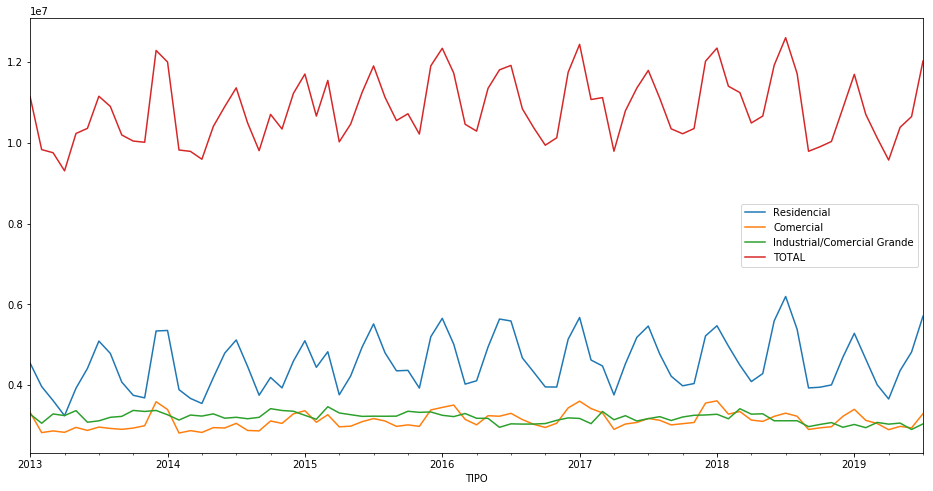

In [92]:
fig, ax= plt.subplots(figsize=(16,8))

data.plot(ax = ax, y=['Residencial', 'Comercial', 'Industrial/Comercial Grande', 'TOTAL'])

### A continuación realizamos la descomposición de la serie temporal en sus componentes

In [93]:
y = data['TOTAL']

In [94]:
decomposition = sm.tsa.x13_arima_analysis(y,x12path='.')

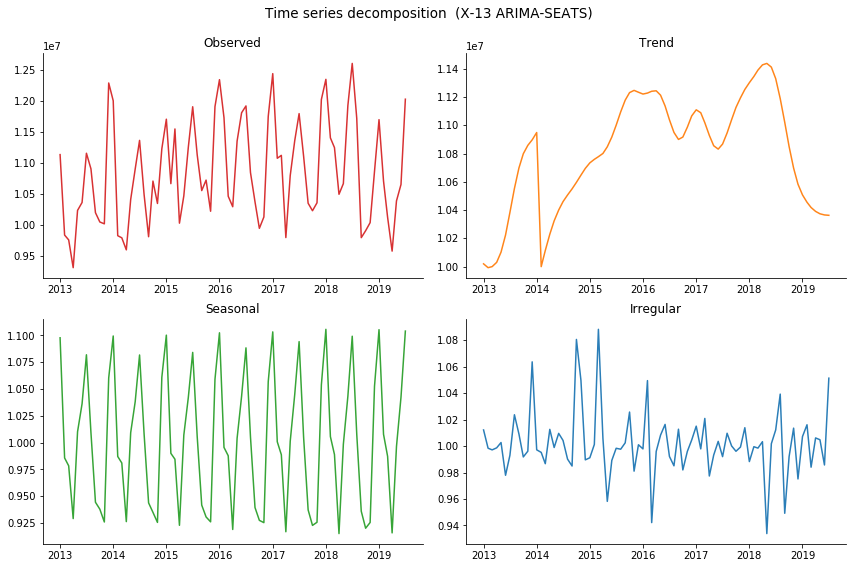

In [95]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

In [96]:
actual= []
pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
indices = []

for i in range(24, len(y)):
    
    indices.append(y.index[i])
    
    actual.append(y.iloc[i])
    
    pred1.append(y.iloc[i-12]) 
    
    mod2 = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(mod2.forecast(1)[0]) 
    
    mod3 = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(mod3.forecast(1)[0]) 

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimizat

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: V

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [97]:
columns=['seasonal random walk', 'additive holt winters', 'multiplicative holt winters', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=indices)

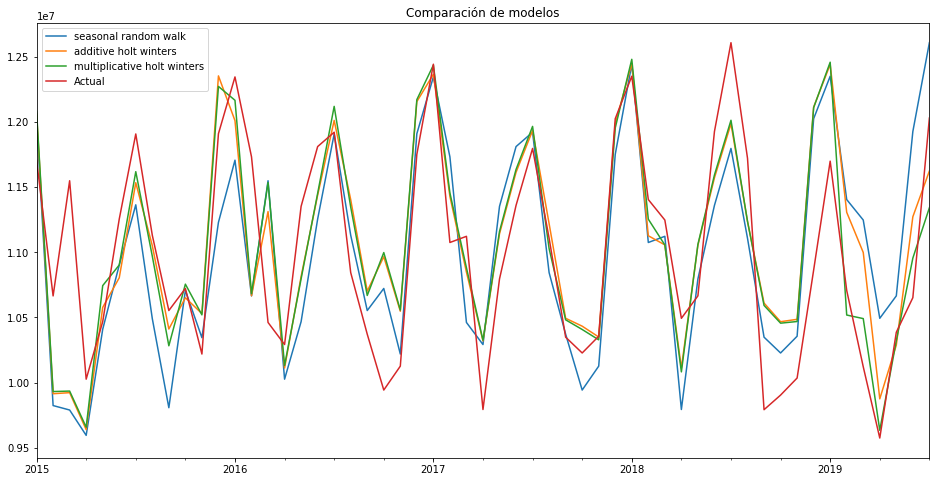

In [98]:
fig, ax= plt.subplots(figsize=(16,8))
results.plot(ax = ax, title='Comparación de modelos')

In [99]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
seasonal random walk,624328.857,84923.021
additive holt winters,529508.276,71339.676
multiplicative holt winters,513823.217,69583.318


/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


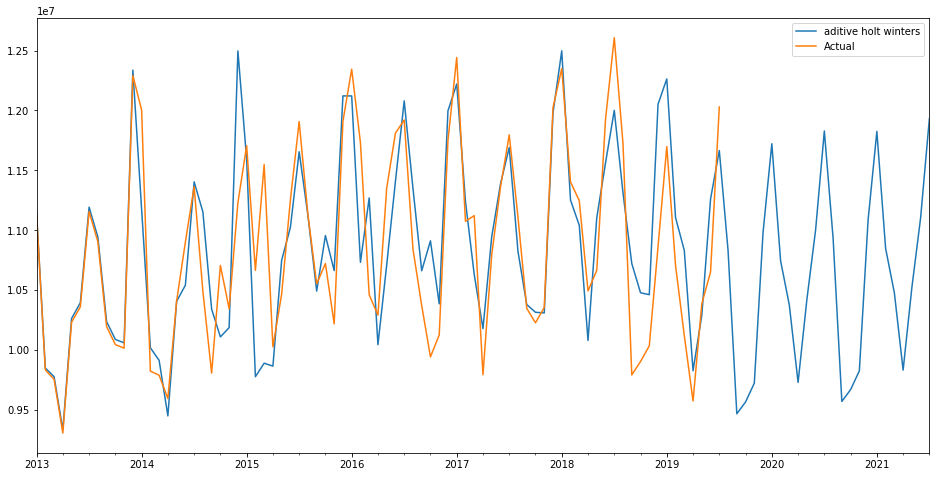

In [100]:
model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()

df = pd.DataFrame()
df['aditive holt winters'] = pd.concat([model.fittedvalues, model.forecast(24)])
df['Actual'] = y
df.plot(figsize=(16,8))

/home/madoery/anaconda3/envs/diplodatos/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


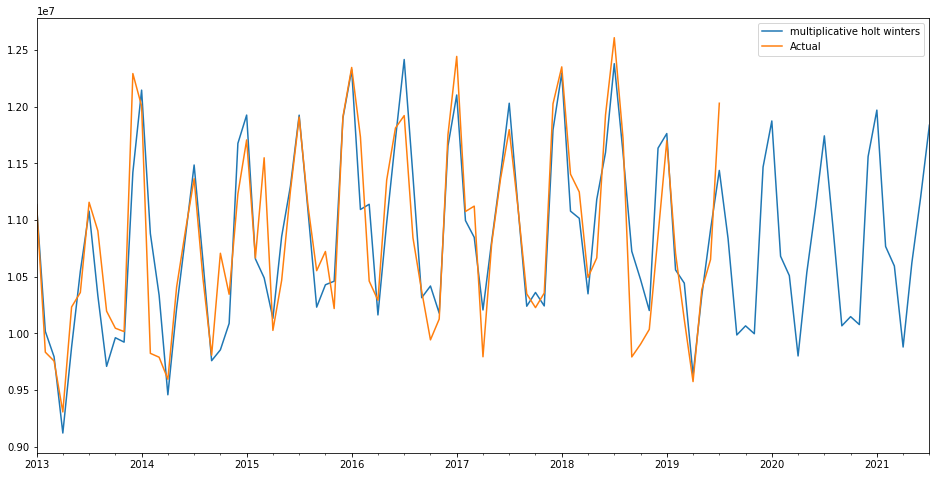

In [101]:
model = sm.tsa.ExponentialSmoothing(y, 
                    trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()

df = pd.DataFrame()
df['multiplicative holt winters'] = pd.concat([model.fittedvalues, model.forecast(24)])
df['Actual'] = y
df.plot(figsize=(16,8))

### Observamos que el modelo holt winters multiplicativo parece ajustarse mejor a los datos de entrenamiento

### A continuación analizamos los residuos

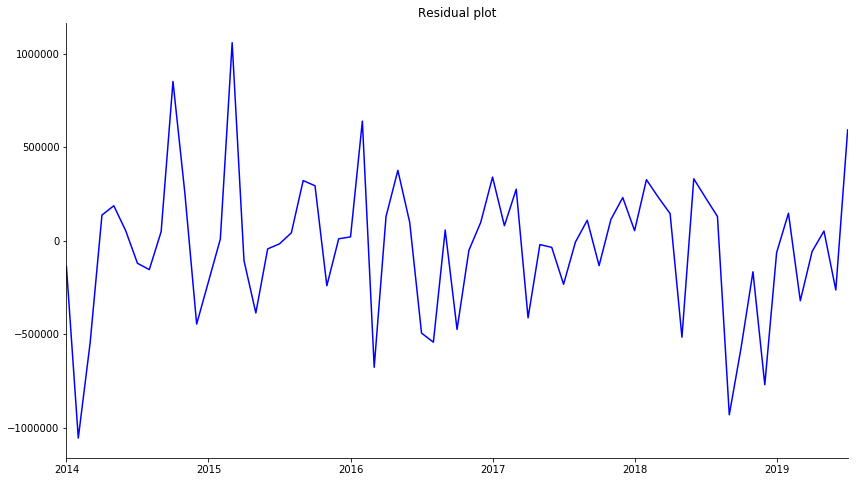

In [105]:
residuos = (y-model.fittedvalues)[12:] 

fig, ax= plt.subplots(figsize=(14,8))
residuos.plot(color='blue')
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

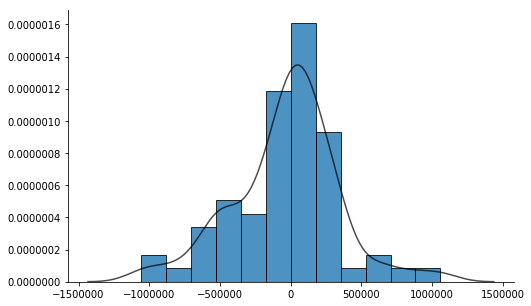

In [106]:
from plotting import histogram
histogram(residuos)
plt.show()


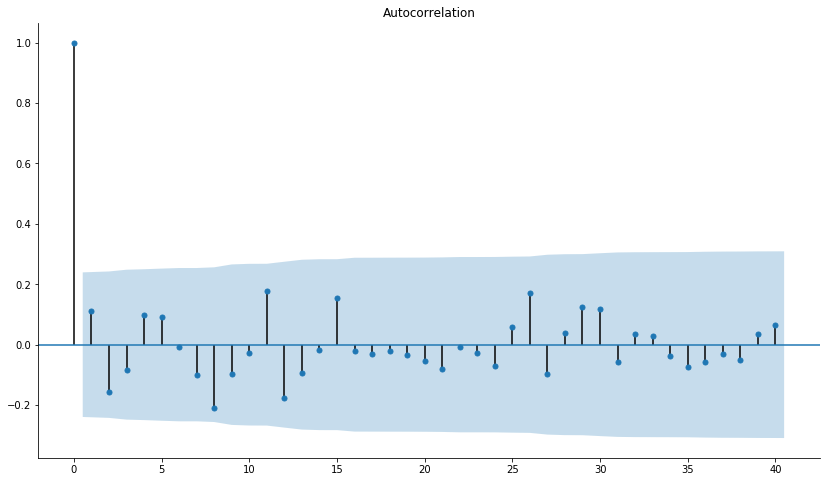

In [107]:
fig, ax = plt.subplots(figsize=(14,8))
sm.graphics.tsa.plot_acf(residuos, lags=40, ax=ax)
sns.despine()
plt.show()

### Los residuos parecen ser ruido y por lo tanto no tener algún patrón no capturado por el modelo.